In [1]:
import numpy as np
import pandas as pd

In [2]:
df= pd.read_csv('airline_passengers.csv')

In [4]:
df.head()

,Month,Thousands of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
df= pd.read_csv('airline_passengers.csv',index_col='Month',parse_dates=True)

In [6]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [7]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

## Getting rid of Missing daatpoints

In [8]:
df= df.dropna()

In [9]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [10]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

## Define the frequency parameter: We can use a String code.


In [11]:
df.index.freq = 'MS'

In [12]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [13]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


# Simple Exponential Smoothing: EWM

In [15]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [17]:
span =12
alpha= 2/(span+1)

In [20]:
df['EWMA']=df['Thousands of Passengers'].ewm(alpha=alpha,adjust=False).mean()

In [22]:
df.head()

,Thousands of Passengers,EWMA
Month,,
1949-01-01,112,112.000000
1949-02-01,118,112.923077
1949-03-01,132,115.857988
1949-04-01,129,117.879836
1949-05-01,121,118.359861


# Create a model

In [26]:
model= SimpleExpSmoothing(df['Thousands of Passengers'])

# Fit the model

In [28]:
model.fit(smoothing_level=alpha,optimized=False)

In [29]:
fitted_model= model.fit(smoothing_level=alpha,optimized=False)

In [30]:
fitted_model.fittedvalues

Month
1949-01-01    112.000000
1949-02-01    112.000000
1949-03-01    112.923077
1949-04-01    115.857988
1949-05-01    117.879836
                 ...    
1960-08-01    474.698368
1960-09-01    494.898619
1960-10-01    496.914216
1960-11-01    491.388952
1960-12-01    475.790652
Freq: MS, Length: 144, dtype: float64

### Since we have set Optimise=False the fitted values have been shifted one over to solve this we can use shift(-1)

In [31]:
fitted_model.fittedvalues.shift(-1)

Month
1949-01-01    112.000000
1949-02-01    112.923077
1949-03-01    115.857988
1949-04-01    117.879836
1949-05-01    118.359861
                 ...    
1960-08-01    494.898619
1960-09-01    496.914216
1960-10-01    491.388952
1960-11-01    475.790652
1960-12-01           NaN
Freq: MS, Length: 144, dtype: float64

In [32]:
df['SES']= fitted_model.fittedvalues.shift(-1)

In [33]:
df.head()

,Thousands of Passengers,EWMA,SES
Month,,,
1949-01-01,112,112.000000,112.000000
1949-02-01,118,112.923077,112.923077
1949-03-01,132,115.857988,115.857988
1949-04-01,129,117.879836,117.879836
1949-05-01,121,118.359861,118.359861


### Creation and Fitting all in one code:

In [37]:
df['SES']= SimpleExpSmoothing(df['Thousands of Passengers']).fit(smoothing_level=alpha,optimized=False).fittedvalues.shift(-1)

In [38]:
df.head()

,Thousands of Passengers,EWMA,SES
Month,,,
1949-01-01,112,112.000000,112.000000
1949-02-01,118,112.923077,112.923077
1949-03-01,132,115.857988,115.857988
1949-04-01,129,117.879836,117.879836
1949-05-01,121,118.359861,118.359861


# Double Exponential Smoothing

In [40]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

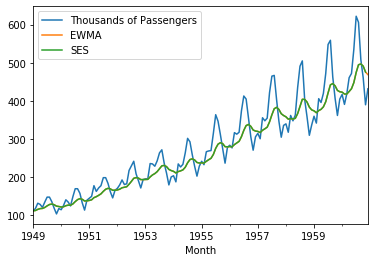

In [41]:
df.plot()

# Using the Additive Trend.

In [42]:
df['DES_add_12']= ExponentialSmoothing(df['Thousands of Passengers'],trend='add').fit().fittedvalues.shift(-1)

In [43]:
df.head()

,Thousands of Passengers,EWMA,SES,DES_add_12
Month,,,,
1949-01-01,112,112.000000,112.000000,114.237772
1949-02-01,118,112.923077,112.923077,120.237772
1949-03-01,132,115.857988,115.857988,134.237772
1949-04-01,129,117.879836,117.879836,131.237772
1949-05-01,121,118.359861,118.359861,123.237772


In [44]:
df.columns

Index(['Thousands of Passengers', 'EWMA', 'SES', 'DES_add_12'], dtype='object')

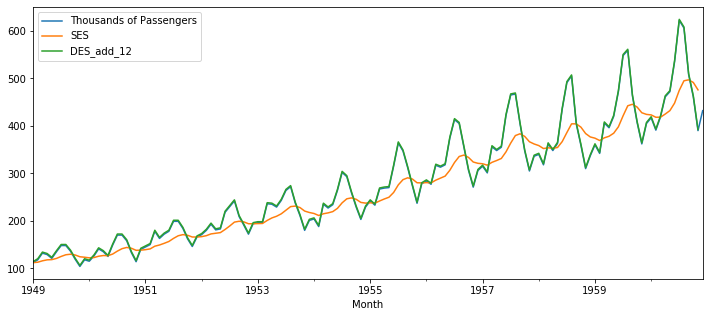

In [46]:
df[['Thousands of Passengers', 'SES', 'DES_add_12']].plot(figsize=(12,5))

## To view data for 2 years

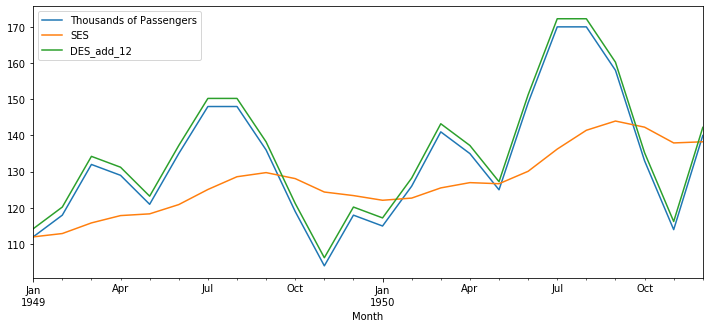

In [48]:
df[['Thousands of Passengers', 'SES', 'DES_add_12']].iloc[:24].plot(figsize=(12,5))

### To view data for last 2 yrs put -24

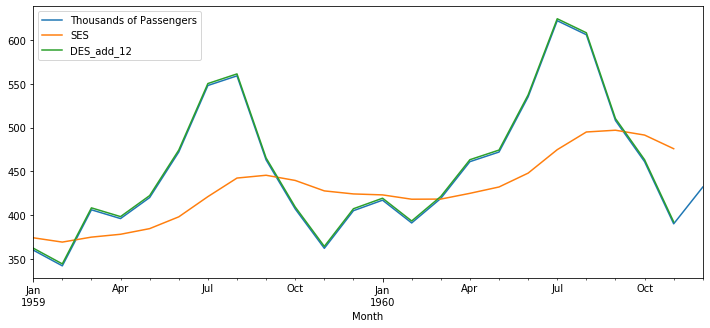

In [50]:
df[['Thousands of Passengers', 'SES', 'DES_add_12']].iloc[-24:].plot(figsize=(12,5))

# Using the Multiplicative Trend.

In [52]:
df['DES_mul_12']= ExponentialSmoothing(df['Thousands of Passengers'],trend='mul').fit().fittedvalues.shift(-1)

In [53]:
df.head()

,Thousands of Passengers,EWMA,SES,DES_add_12,DES_mul_12
Month,,,,,
1949-01-01,112,112.000000,112.000000,114.237772,112.049247
1949-02-01,118,112.923077,112.923077,120.237772,118.051885
1949-03-01,132,115.857988,115.857988,134.237772,132.058041
1949-04-01,129,117.879836,117.879836,131.237772,129.056722
1949-05-01,121,118.359861,118.359861,123.237772,121.053204


In [54]:
df.columns

Index(['Thousands of Passengers', 'EWMA', 'SES', 'DES_add_12', 'DES_mul_12'], dtype='object')

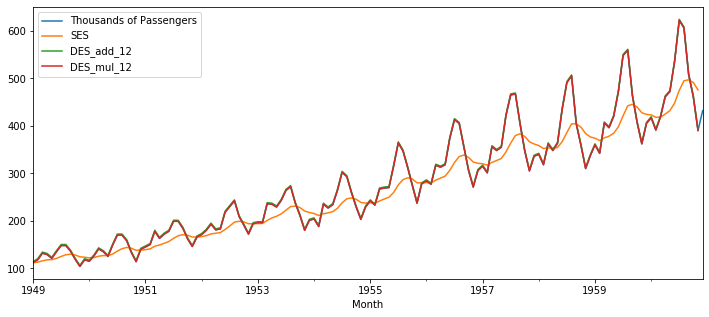

In [59]:
df[['Thousands of Passengers', 'SES','DES_add_12', 'DES_mul_12']].plot(figsize=(12,5))

## To view Data for 2 years

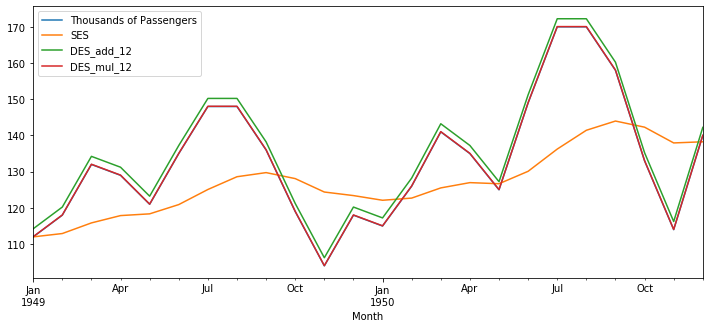

In [60]:
df[['Thousands of Passengers', 'SES','DES_add_12', 'DES_mul_12']].iloc[:24].plot(figsize=(12,5))

## To view Data for last 2 years

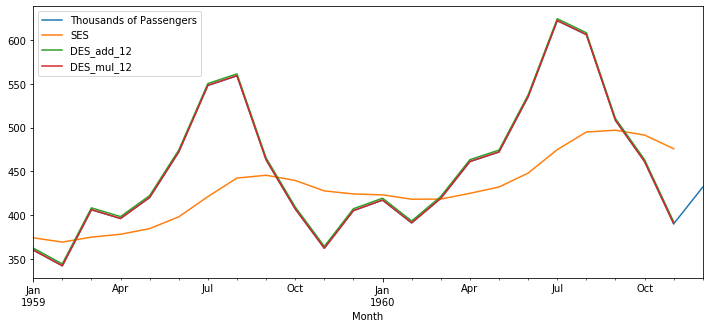

In [61]:
df[['Thousands of Passengers', 'SES','DES_add_12', 'DES_mul_12']].iloc[-24:].plot(figsize=(12,5))

# Triple Exponential Smoothing

## adding the seasonality component along with the trend component.

### here we do not need to consider the shift. It gets handeled due to the seasonality component.

In [62]:
df['TES-mul_12']=ExponentialSmoothing(df['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues

In [63]:
df.head()

,Thousands of Passengers,EWMA,SES,DES_add_12,DES_mul_12,TES-mul_12
Month,,,,,,
1949-01-01,112,112.000000,112.000000,114.237772,112.049247,111.608110
1949-02-01,118,112.923077,112.923077,120.237772,118.051885,118.853687
1949-03-01,132,115.857988,115.857988,134.237772,132.058041,133.343675
1949-04-01,129,117.879836,117.879836,131.237772,129.056722,127.912641
1949-05-01,121,118.359861,118.359861,123.237772,121.053204,120.991626


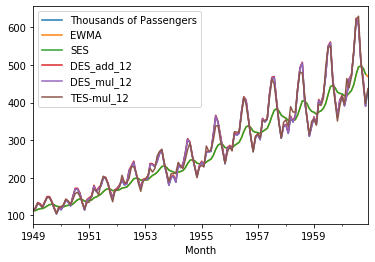

In [64]:
df.plot()

In [65]:
df.columns

Index(['Thousands of Passengers', 'EWMA', 'SES', 'DES_add_12', 'DES_mul_12',
       'TES-mul_12'],
      dtype='object')

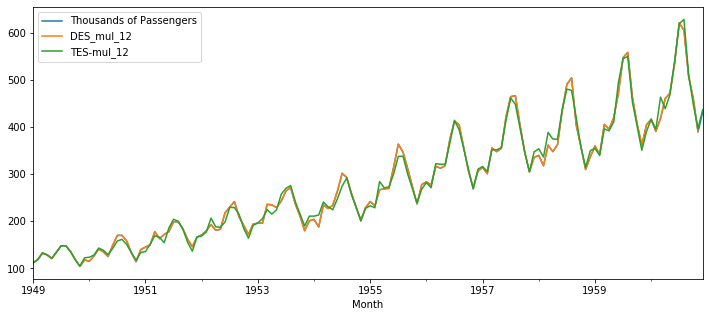

In [70]:
df[['Thousands of Passengers','DES_mul_12','TES-mul_12']].plot(figsize=(12,5))

## To view Data for first 2 years

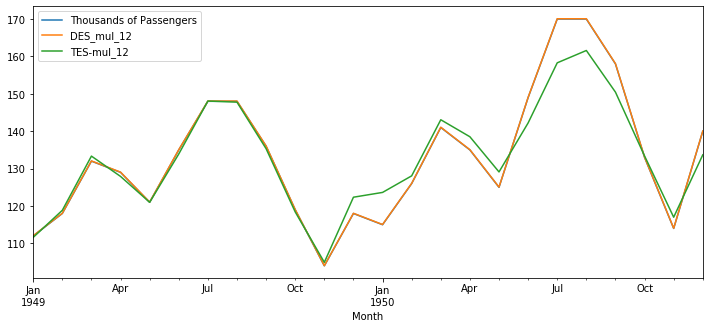

In [71]:
df[['Thousands of Passengers','DES_mul_12','TES-mul_12']].iloc[:24].plot(figsize=(12,5))

## To view Data for last 2 years

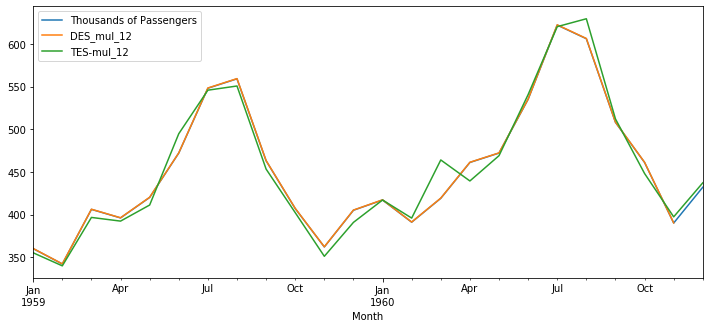

In [72]:
df[['Thousands of Passengers','DES_mul_12','TES-mul_12']].iloc[-24:].plot(figsize=(12,5))

# In this case <strong> Double Exponential Smoothing (DES)</strong> is Better than <strong> Triple Exponential Smoothing(TES)</strong>